In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data

# Regression Evaluation Exercises

## 1

Load the tips dataset from either pydataset or seaborn.

In [2]:
tips = data('tips')
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


## 2

Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [3]:
from sklearn.linear_model import LinearRegression

# Who needs to split data?
X = tips[['total_bill']]
y = tips['tip']

# assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

In [4]:
predictions

array([2.70463616, 2.00622312, 3.12683472, 3.40725019, 3.5028225 ,
       3.57633966, 1.84133463, 3.74332864, 2.49983836, 2.47253198,
       1.99887141, 4.6234341 , 2.53974767, 2.85587147, 2.47778321,
       3.1866987 , 2.00517288, 2.631119  , 2.70253567, 3.0890259 ,
       2.80230897, 3.05121707, 2.57650625, 5.06033609, 3.00185555,
       2.79075627, 2.32444741, 2.25303074, 3.19930164, 2.98400138,
       1.92325375, 2.84746951, 2.50193885, 3.09322688, 2.78760553,
       3.4471595 , 2.63321949, 2.69833469, 2.88317784, 4.20438627,
       2.60486287, 2.75399769, 2.38431139, 1.93690694, 4.11301494,
       2.84116804, 3.25496464, 4.32306398, 3.91871958, 2.81491191,
       2.23727706, 2.0009719 , 4.57617306, 1.96421332, 3.60469628,
       2.96719746, 4.91225152, 3.69396712, 2.10074519, 5.98980307,
       3.05121707, 2.3706582 , 2.0776398 , 2.84116804, 2.76765087,
       3.02916192, 2.64792292, 1.24269488, 3.0449156 , 2.49668762,
       2.18266431, 2.71303813, 3.74122815, 3.57528941, 2.46728

## 3

Plot the residuals for the linear regression model that you made.

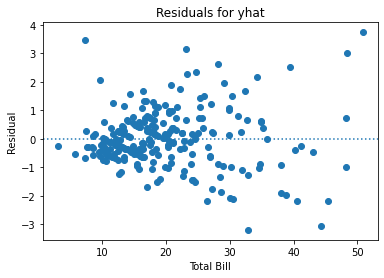

In [5]:
residuals = y - predictions
plt.scatter(X, residuals)
plt.axhline(0, ls = ':')
plt.xlabel('Total Bill')
plt.ylabel('Residual')
plt.title('Residuals for yhat');

## 4

Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
MSE = mean_squared_error(y, predictions)
MSE

1.036019442011377

In [8]:
SSE = MSE * len(tips)
SSE

252.788743850776

In [9]:
RMSE = mean_squared_error(y, predictions, squared = False)
RMSE

1.0178504025697377

In [10]:
ESS = sum((predictions - y.mean()) ** 2)
ESS

212.42373319840416

In [11]:
TSS = SSE + ESS
TSS

465.21247704918017

## 5

Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [12]:
baseline = y.mean()
baseline

2.9982786885245902

In [13]:
tips['baseline'] = baseline

In [14]:
MSE = mean_squared_error(y, tips['baseline'])
MSE

1.906608512496641

In [15]:
SSE = MSE * len(tips)
SSE

465.2124770491804

In [16]:
RMSE = mean_squared_error(y, tips['baseline'], squared = False)
RMSE

1.3807999538298954

## 6

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [17]:
MSE_baseline = mean_squared_error(y, tips['baseline'])
SSE_baseline = MSE_baseline * len(tips)

MSE_model = mean_squared_error(y, predictions)
SSE_model = MSE_model * len(tips)

if SSE_model < SSE_baseline:
    print('The model performs better than the baseline.')
else:
    print('The model does not perform better than the baseline.')

The model performs better than the baseline.


## 7

What is the amount of variance explained in your model?

In [18]:
from sklearn.metrics import r2_score

In [19]:
r2_score(y, predictions)

0.45661658635167657

## 8

Is your model better than the baseline model?

In [20]:
RMSE_model = mean_squared_error(y, predictions, squared = False)
RMSE_baseline = mean_squared_error(y, tips['baseline'], squared = False)

if RMSE_model < RMSE_baseline:
    print('Our model is better than the baseline.')
else:
    print('Our model is not better than the baseline.')

Our model is better than the baseline.


## 9

Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [21]:
from evaluate import *

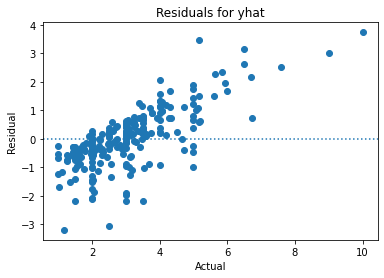

In [23]:
plot_residuals(y, predictions)

In [24]:
regression_errors(y, predictions)


            sum of squared errors (SSE):     252.788743850776
            explained sum of squares (ESS):  212.42373319840416
            total sum of squares (TSS):      465.21247704918017
            mean squared error (MSE):        1.036019442011377
            root mean squared error (RMSE):  1.0178504025697377
        


In [25]:
baseline_mean_errors(y, tips['baseline'])


            Baseline sum of squared errors (SSE):     465.2124770491804
            Baseline mean squared error (MSE):        1.906608512496641
            Baseline root mean squared error (RMSE):  1.3807999538298954
        


In [22]:
better_than_baseline(y, predictions)

True

## 10

Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [26]:
mpg = data('mpg')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [28]:
X = mpg[['displ']]
y = mpg['hwy']

# assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

In [29]:
mpg['baseline'] = mpg.hwy.mean()

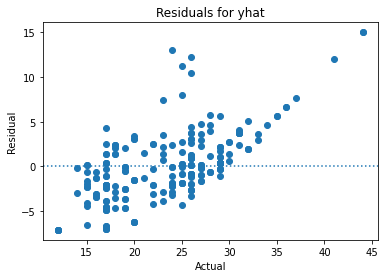

In [30]:
plot_residuals(y, predictions)

In [31]:
regression_errors(y, predictions)


            sum of squared errors (SSE):     3413.829008995467
            explained sum of squares (ESS):  4847.833384166925
            total sum of squares (TSS):      8261.66239316239
            mean squared error (MSE):        14.589012858954987
            root mean squared error (RMSE):  3.8195566312014524
        


In [32]:
baseline_mean_errors(y, mpg['baseline'])


            Baseline sum of squared errors (SSE):     8261.66239316239
            Baseline mean squared error (MSE):        35.30624954342902
            Baseline root mean squared error (RMSE):  5.941906221359356
        


In [33]:
better_than_baseline(y, predictions)

True

Our model performs better than the baseline.